In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PROCESSED = Path("../data/processed")
OUT_FIG = Path("../outputs/figures")
OUT_TAB = Path("../outputs/tables")

OUT_FIG.mkdir(parents=True, exist_ok=True)
OUT_TAB.mkdir(parents=True, exist_ok=True)


In [6]:
df = pd.read_csv(DATA_PROCESSED / "model_data.csv")
df.head()


,week,store_id,product_id,units_sold,selling_price,category,cost_price,discount_percent,marketing_spend,final_price,revenue,profit
0,1,S01,P001,17.0,51.95,Dairy,31.77,0.0,8047.96,51.950,883.150,343.060
1,1,S01,P002,7.0,38.57,Household,26.05,0.0,8047.96,38.570,269.990,87.640
2,1,S01,P003,25.0,34.52,Beverages,23.56,15.0,8047.96,29.342,733.550,144.550
3,1,S01,P004,29.0,35.43,Snacks,22.08,20.0,8047.96,28.344,821.976,181.656
4,1,S01,P005,19.0,19.55,Fresh,14.62,0.0,8047.96,19.550,371.450,93.670


## Revenue and Profit Trends

In [7]:
# Weekly Balance sheet kinda shit
weekly = df.groupby("week").agg({
    "units_sold": "sum",
    "revenue": "sum",
    "profit": "sum"
}).reset_index()

weekly.head()


,week,units_sold,revenue,profit
0,1,10193.0,342404.1245,85789.1145
1,2,10544.0,352289.2575,85377.8675
2,3,10296.0,347520.7155,85796.4155
3,4,10230.0,340424.2330,83514.6530
4,5,10667.0,357278.0620,87084.1320


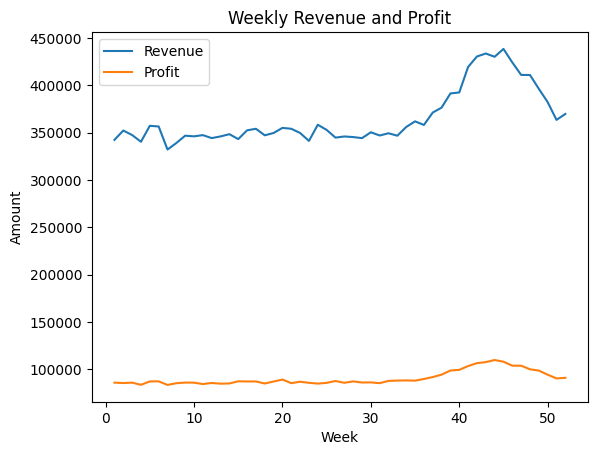

In [8]:
plt.figure()
plt.plot(weekly["week"], weekly["revenue"], label="Revenue")
plt.plot(weekly["week"], weekly["profit"], label="Profit")
plt.xlabel("Week")
plt.ylabel("Amount")
plt.title("Weekly Revenue and Profit")
plt.legend()
plt.show()


In [9]:
weekly.to_csv(OUT_TAB / "weekly_summary.csv", index=False)


## Discount Effects

In [10]:
df["discount_bucket"] = pd.cut(
    df["discount_percent"],
    bins=[-0.1, 0, 5, 10, 15, 20, 30],
    labels=["0", "1–5", "6–10", "11–15", "16–20", "20+"]
)


In [11]:
discount_analysis = df.groupby("discount_bucket").agg({
    "units_sold": "mean",
    "revenue": "mean",
    "profit": "mean"
}).reset_index()

discount_analysis


/var/folders/rq/4vpzqrcx2cscr_bnn_6492pr0000gn/T/ipykernel_44693/2758298942.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby("discount_bucket").agg({


,discount_bucket,units_sold,revenue,profit
0,0,19.954468,691.436435,185.001622
1,1–5,23.921053,792.096855,184.806719
2,6–10,29.353175,902.330807,180.154307
3,11–15,34.022876,996.050111,154.959599
4,16–20,40.981685,1122.491443,115.840894
5,20+,49.074074,1260.719568,58.665453


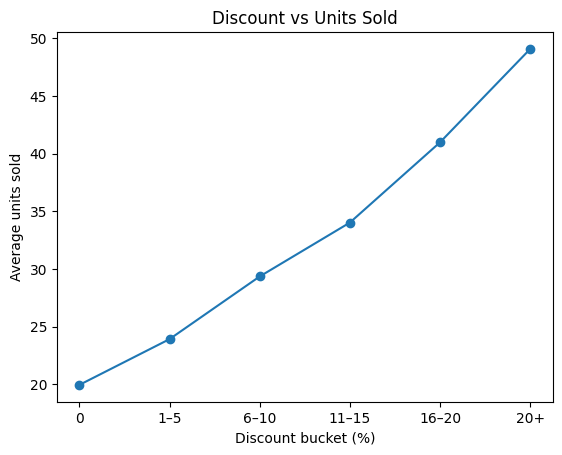

In [12]:
plt.figure()
plt.plot(discount_analysis["discount_bucket"], discount_analysis["units_sold"], marker="o")
plt.xlabel("Discount bucket (%)")
plt.ylabel("Average units sold")
plt.title("Discount vs Units Sold")
plt.show()


In [13]:
discount_analysis.to_csv(OUT_TAB / "discount_effect_summary.csv", index=False)


In [14]:
df["price_bucket"] = pd.qcut(df["final_price"], q=5, duplicates="drop")


In [15]:
price_analysis = df.groupby("price_bucket")["units_sold"].mean().reset_index()
price_analysis



/var/folders/rq/4vpzqrcx2cscr_bnn_6492pr0000gn/T/ipykernel_44693/4264657153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_analysis = df.groupby("price_bucket")["units_sold"].mean().reset_index()


,price_bucket,units_sold
0,"(9.442, 26.614]",27.341609
1,"(26.614, 30.35]",20.235836
2,"(30.35, 37.72]",22.210415
3,"(37.72, 43.55]",21.359177
4,"(43.55, 60.09]",17.861850


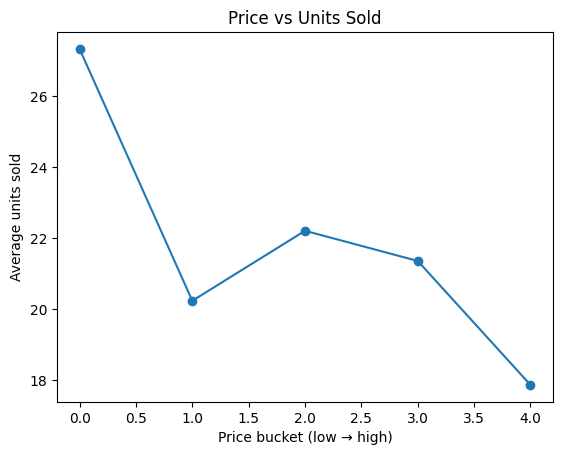

In [16]:
plt.figure()
plt.plot(range(len(price_analysis)), price_analysis["units_sold"], marker="o")
plt.xlabel("Price bucket (low → high)")
plt.ylabel("Average units sold")
plt.title("Price vs Units Sold")
plt.show()


In [17]:
category_summary = df.groupby("category").agg({
    "units_sold": "mean",
    "revenue": "mean",
    "profit": "mean",
    "discount_percent": "mean"
}).reset_index()

category_summary


,category,units_sold,revenue,profit,discount_percent
0,Beverages,25.297627,839.012584,227.438947,3.236049
1,Dairy,20.437921,752.673291,227.136018,1.047883
2,Fresh,21.779008,752.788757,162.158809,0.817285
3,Household,15.384933,467.751199,123.983930,0.904592
4,Snacks,24.509546,784.202068,185.281637,3.659908


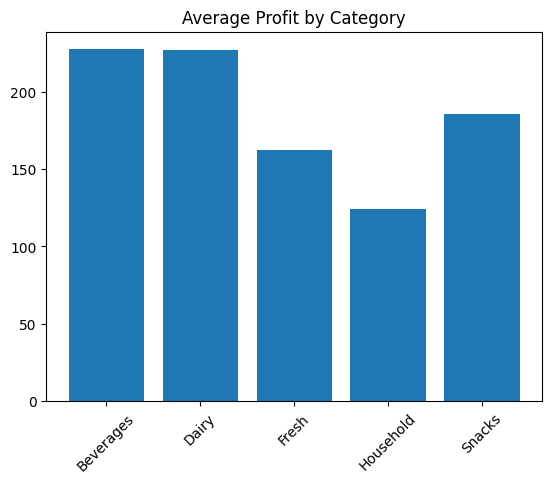

In [18]:
plt.figure()
plt.bar(category_summary["category"], category_summary["profit"])
plt.xticks(rotation=45)
plt.title("Average Profit by Category")
plt.show()


In [19]:
category_summary.to_csv(OUT_TAB / "category_summary.csv", index=False)


In [20]:
store_summary = df.groupby("store_id").agg({
    "units_sold": "mean",
    "revenue": "mean",
    "profit": "mean"
}).reset_index()

store_summary.sort_values("revenue", ascending=False).head()


,store_id,units_sold,revenue,profit
8,S09,26.064665,874.404070,216.513974
2,S03,25.655252,864.195575,214.398884
6,S07,24.798691,830.993001,204.863825
1,S02,24.312548,818.140248,204.012254
4,S05,23.229881,781.711659,193.415906


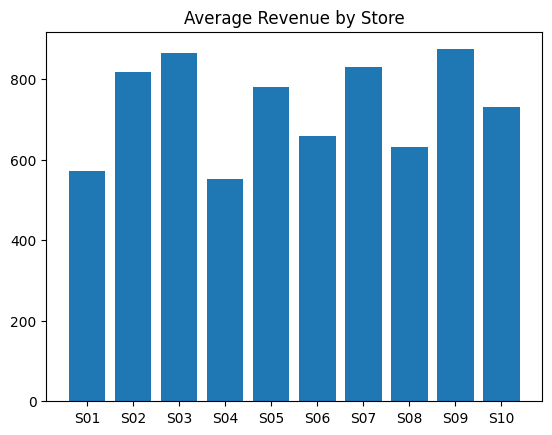

In [21]:
plt.figure()
plt.bar(store_summary["store_id"], store_summary["revenue"])
plt.title("Average Revenue by Store")
plt.show()


# Key Observations

- Revenue and Profit follow similar trends and also these values are higher in the later weeks that si around 40 -50 weeks
- As we increase the Discount, the Number of units sold also increase, which prooves basic finance.
- As we increase the Price of product, the number of units sold  after a certain point reduce.
- No trends or crazy stuff to observe in Category and stores data